# Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math 
import warnings
warnings.filterwarnings("ignore")

# Q4

## 5.1

In [ ]:
np.random.seed(42)

class BlackJack():
  def __init__(self):
    self.play = []
    self.deal = []
    self.decklist = list(np.arange(1,11)) + [10,10,10]
    self.start()

  def playcard(self):
    return np.random.choice(self.decklist)

  def playhand(self):
      return [self.playcard(),self.playcard()]

  def currentusability(self,draw):  
    total_sum = sum(draw)
    if 1 in draw:
      if total_sum + 10<=21:
        return True
      else :
        return False
    else :
      return False      

  def currentsum(self,draw):  
    if self.currentusability(draw)==True:
      total_sum = sum(draw) + 10 
    else :
      total_sum = sum(draw)   
    return total_sum

  def currentbust(self,draw):  
    total_sum = sum(draw)
    if total_sum>21:
      return True
    else :
      return False  

  def score(self,draw):
    if self.currentbust(draw)==True:
      return 0
    else :
      return self.currentsum(draw) 

  def step(self, action):

    end = True
    # Hit : Player turn  
    if action==1: 
        self.play.append(self.playcard())
        if self.currentbust(self.play):
            reward = -1
        else:
            end = False
            reward = 0

    # Stick: Dealers turn 
    else:       

        while self.currentsum(self.deal) < 17:
            self.deal.append(self.playcard())
        playsc = self.score(self.play)
        dealsc = self.score(self.deal)   
        if playsc == dealsc:
          reward = 0
        elif playsc > dealsc:
          reward = 1
        else :
          reward = 0 
    observation = [self.currentsum(self.play), self.deal[0], self.currentusability(self.play)]       
    step_results =  [observation , reward , end , {}] 
    return step_results 

  def start(self):
      self.deal = self.playhand()
      self.play = self.playhand()
      while self.currentsum(self.play) < 12:
          self.play.append(self.playcard())

      observation = [self.currentsum(self.play), self.deal[0], self.currentusability(self.play)]
      return observation

def Monte_Carlo_Prediction(Episode_Lenght,Policy,BlackJact_Env,Alpha):
    Return_St = defaultdict(float)
    Count_St = defaultdict(float)
    Value_St = defaultdict(float)

    for i in range(Episode_Lenght):
      # Generating Episode (S,A,R)
      Episode = []
      States = []
      S0 = BlackJact_Env.start()
      for _ in range(1000):
          A0 = Policy(S0)
          observation = BlackJact_Env.step(A0) # (State,Reward,End)
          Episode.append([observation[0],observation[1],observation[2]])
          States.append(tuple(observation[0]))
          if observation[2]==True:
              break
          S0 = observation[0]

      G = 0
      States_Visited = []
      for i in range(len(Episode)-1,-1,-1):
        G = Alpha*G + Episode[i][1]
        if States[i] in States_Visited:
          continue
        else :   
          Return_St[States[i]] = Return_St[States[i]] + G
          Count_St[States[i]] = Count_St[States[i]] + 1
          Value_St[States[i]] = Return_St[States[i]]/Count_St[States[i]]
          States_Visited.append(States[i])

    return Value_St

def Policy(State):
    Player_Score,_,_ = State
    if Player_Score>=20:
      return 0
    else :
      return 1  

def Plotting_Value_Function(Value_St,count):
  Play_show = [i[0] for i in Value_St.keys()]
  Deal_show = [i[1] for i in Value_St.keys()]

  Play_range = np.arange(min(Play_show)-1,max(Play_show)+1)
  Deal_range = np.arange(min(Deal_show)-1,max(Deal_show)+1)
  P, D = np.meshgrid(Play_range,Deal_range)
  T = np.dstack([P, D])

  # Usable and usable ace
  usevalues = lambda _: Value_St[(_[0], _[1], True)]
  unusevalues = lambda _: Value_St[(_[0], _[1], False)]

  P1 = np.apply_along_axis(usevalues,2,T)
  P2 = np.apply_along_axis(unusevalues,2,T)

  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(D,P,P1,color = 'aliceblue')
  ax.set_xlabel('Player Sum')
  ax.set_ylabel('Dealer Showing')
  ax.set_zlabel('Value')
  plt.title("After "+str(count)+" episodes , Usable ace")
  plt.show()

  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(D,P,P2,color = 'aliceblue')
  ax.set_xlabel('Player Sum')
  ax.set_ylabel('Dealer Showing')
  ax.set_zlabel('Value')
  plt.title("After "+str(count)+" episodes , no usable ace")
  plt.show()

def RemoveDict(V):
  for i in list(V.keys()):
    if i[0]>21:
      del V[i]    

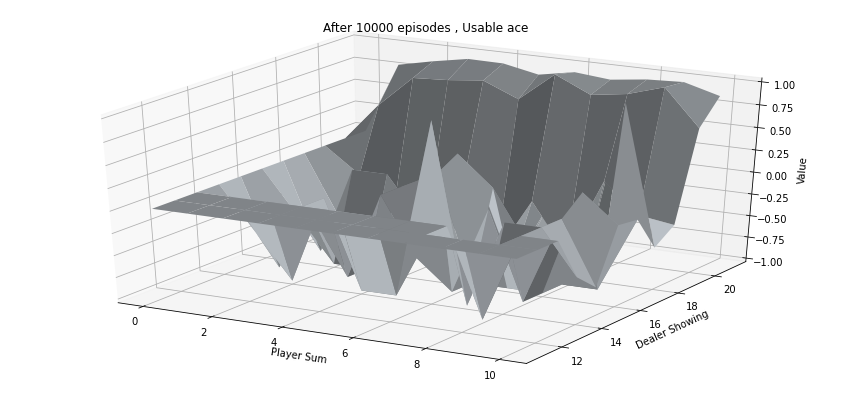

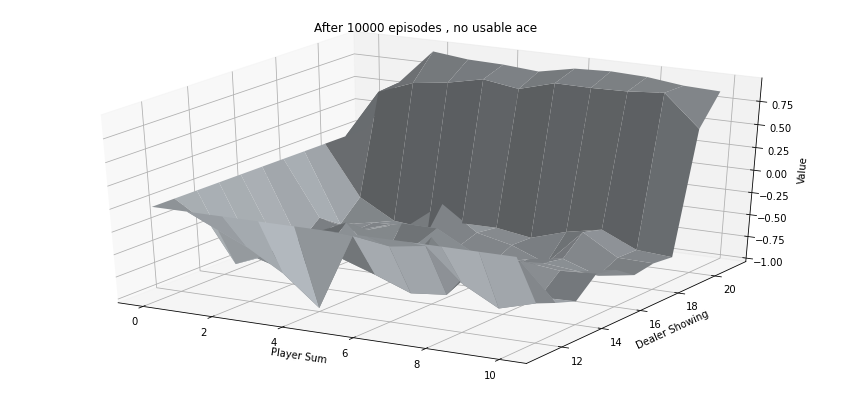

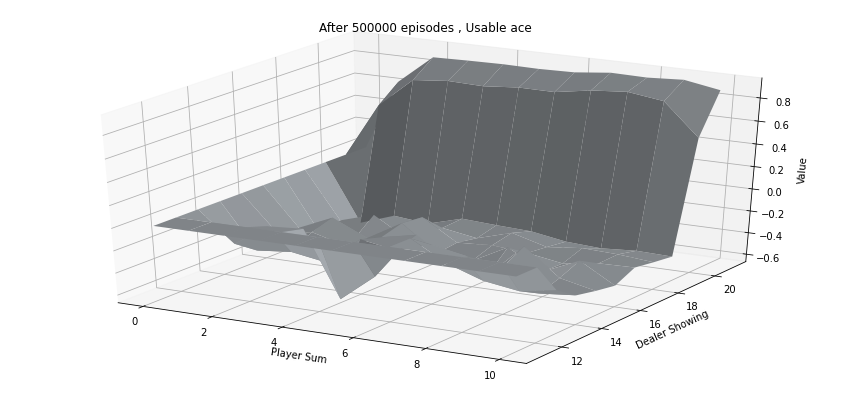

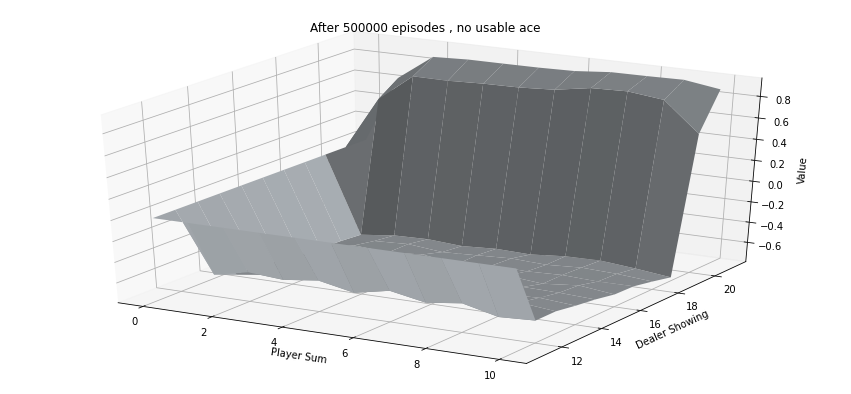

In [ ]:
bj = BlackJack()

V1 = Monte_Carlo_Prediction(10000,Policy,bj,1)
RemoveDict(V1)
Plotting_Value_Function(V1,count=10000)

V2 = Monte_Carlo_Prediction(500000,Policy,bj,1)
RemoveDict(V2)
Plotting_Value_Function(V2,count=500000)

## 5.2

In [ ]:
np.random.seed(42)

class BlackJack():
  def __init__(self):
    self.play = []
    self.deal = []
    self.decklist = list(np.arange(1,11)) + [10,10,10]
    self.start()

  def playcard(self):
    return np.random.choice(self.decklist)

  def playhand(self):
      return [self.playcard(),self.playcard()]

  def currentusability(self,draw):  
    total_sum = sum(draw)
    if 1 in draw:
      if total_sum + 10<=21:
        return True
      else :
        return False
    else :
      return False      

  def currentsum(self,draw):  
    if self.currentusability(draw)==True:
      total_sum = sum(draw) + 10 
    else :
      total_sum = sum(draw)   
    return total_sum

  def currentbust(self,draw):  
    total_sum = sum(draw)
    if total_sum>21:
      return True
    else :
      return False  

  def score(self,draw):
    if self.currentbust(draw)==True:
      return 0
    else :
      return self.currentsum(draw) 

  def step(self, action):

    end = True
    # Hit : Player turn  
    if action==1: 
        self.play.append(self.playcard())
        if self.currentbust(self.play):
            reward = -1
        else:
            end = False
            reward = 0

    # Stick: Dealers turn 
    else:       

        while self.currentsum(self.deal) < 17:
            self.deal.append(self.playcard())
        playsc = self.score(self.play)
        dealsc = self.score(self.deal)   
        if playsc == dealsc:
          reward = 0
        elif playsc > dealsc:
          reward = 1
        else :
          reward = 0 
    observation = [self.currentsum(self.play), self.deal[0], self.currentusability(self.play)]       
    step_results =  [observation , reward , end , {}] 
    return step_results 

  def start(self):
      self.deal = self.playhand()
      self.play = self.playhand()
      while self.currentsum(self.play) < 12:
          self.play.append(self.playcard())

      observation = [self.currentsum(self.play), self.deal[0], self.currentusability(self.play)]
      return observation

def Monte_Carlo_Control(Episode_Lenght,Policy,BlackJact_Env,Alpha,Epislon):
    Return_St = defaultdict(float)
    Count_St = defaultdict(float)
    Q_St = defaultdict(float)

    for i in range(Episode_Lenght):
      # Generating Episode (S,A,R)
      Episode = []
      State_Action = []
      S0 = BlackJact_Env.start()
      for _ in range(1000):
          ActionProb = Policy(S0,Q_St,Epislon)
          A0 = np.random.choice(2,p = ActionProb)
          observation = BlackJact_Env.step(A0) # (State,Reward,End)
          Episode.append([observation[0],observation[1],observation[2]])
          State_Action.append((tuple(observation[0]),A0))
          if observation[2]==True:
              break
          S0 = observation[0]

      G = 0
      States_Action_Visited = []
      for i in range(len(Episode)-1,-1,-1):
        s = State_Action[i][0]
        a = State_Action[i][1]        
        G = Alpha*G + Episode[i][1]
        if State_Action[i] in States_Action_Visited:
          continue
        else :   
          Return_St[(s,a)] = Return_St[(s,a)] + G
          Count_St[(s,a)] = Count_St[(s,a)] + 1
          Q_St[(s,a)] = Return_St[(s,a)]/Count_St[(s,a)]
          States_Action_Visited.append((s,a))

    return Q_St

def NewPolicy(State,Q_St,Epislon):
    keys = list(Q_St.keys())
    Q_value_0 = Q_value_1 = 0
    if len(Q_St):
      Pi = np.array([0.5,0.5])
    else:
      if (State,0) in keys:
        Q_value_0 = Q[(State,0)]
      if (State,1) in keys:  
        Q_value_1 = Q[(State,1)]
      Q_value = np.array([Q_value_0,Q_value_1])
      Optimal_Act = np.argmax(Q_value)
      Pi = np.zeros(2)
      Pi[Optimal_Act] = (1-Epislon) + (Epislon/2)
      Pi[1-Optimal_Act] = (Epislon/2)
    return Pi  

def Plotting_Value_Function(Value_St,count):
  Play_show = [i[0] for i in Value_St.keys()]
  Deal_show = [i[1] for i in Value_St.keys()]

  Play_range = np.arange(min(Play_show)-1,max(Play_show)+1)
  Deal_range = np.arange(min(Deal_show)-1,max(Deal_show)+1)
  P, D = np.meshgrid(Play_range,Deal_range)
  T = np.dstack([P, D])

  # Usable and usable ace
  usevalues = lambda _: Value_St[(_[0], _[1], True)]
  unusevalues = lambda _: Value_St[(_[0], _[1], False)]

  P1 = np.apply_along_axis(usevalues,2,T)
  P2 = np.apply_along_axis(unusevalues,2,T)
  
  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(D,P,P1,color = 'aliceblue')
  ax.set_xlabel('Player Sum')
  ax.set_ylabel('Dealer Showing')
  ax.set_zlabel('Value')
  plt.title("After "+str(count)+" episodes , Usable ace")
  plt.show()

  fig = plt.figure(figsize=(15, 7))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(D,P,P2,color = 'aliceblue')
  ax.set_xlabel('Player Sum')
  ax.set_ylabel('Dealer Showing')
  ax.set_zlabel('Value')
  plt.title("After "+str(count)+" episodes , no usable ace")
  plt.show()

def GetValueFromStateValue(Q_St):
  Q_df = pd.DataFrame()
  state = []
  action = []
  value = []
  for i in list(Q1.keys()):
    key = i
    state.append(key[0])
    action.append(key[1])
    value.append(Q1[i])

  Q_df['State'] = state
  Q_df['Action'] = action 
  Q_df['Value'] = value
  Q_df.sort_values(by=['State', 'Action'],inplace =True)

  i = 0
  V1 = defaultdict(float)
  while i<len(Q_df)-1:
    if Q_df.iloc[i]['State'] == Q_df.iloc[i+1]['State']:
      V1[Q_df.iloc[i]['State']] = max(Q_df.iloc[i]['Value'],Q_df.iloc[i]['Value'])
      i = i + 2
    else :
      V1[Q_df.iloc[i]['State']] = Q_df.iloc[i]['Value']
      i = i + 1
  
  return V1

def RemoveDict(V):
  for i in list(V.keys()):
    if i[0]>21:
      del V[i]  

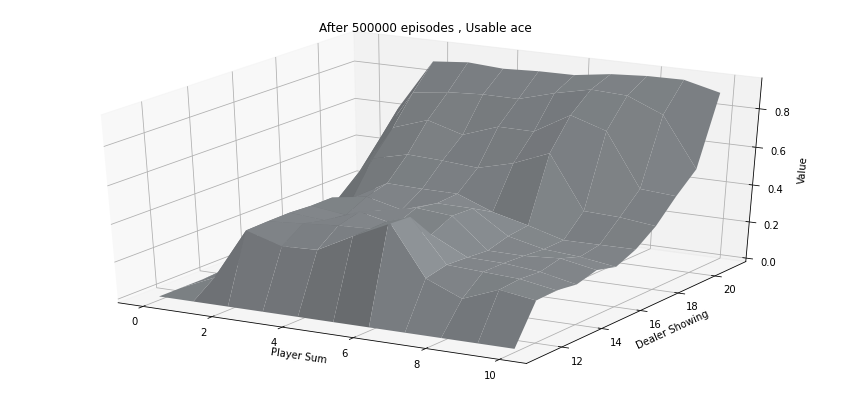

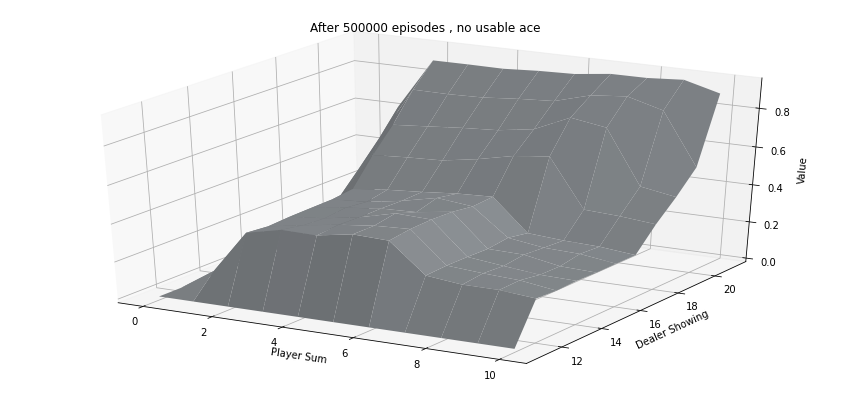

In [ ]:
bj = BlackJack()
Q1 = Monte_Carlo_Control(500000,NewPolicy,bj,1,0.1)
V1 = GetValueFromStateValue(Q1)
RemoveDict(V1)
Plotting_Value_Function(V1,count=500000)

# Q6

In [ ]:
class Random_Walk:

  def __init__(self):    
    self.V_Est = np.array([0.5]*7)
    self.V_True = np.array([0,1/6,2/6,3/6,4/6,5/6,1])
    self.Action = [0,1]

  def TD(self,initial_state,step_size,discounting):
      episode = [initial_state]
      received_rewards = []
      state = initial_state
      while True:
        a = np.random.binomial(1,0.5) 
        if a == self.Action[1]:
          new_state = state + 1
          if state ==6:
            reward = 1
          else :
            reward = 0  
        else:
          new_state = state - 1  
          reward = 0
        episode.append(new_state)
        received_rewards.append(reward)

        self.V_Est[state] = self.V_Est[state] + step_size*(reward + discounting*self.V_Est[new_state] - self.V_Est[state])
        state = new_state
        if state in [0,6]:
            break
      return [episode,received_rewards]

  def MC(self,initial_state,step_size , discounting):
    episode = [initial_state]
    received_rewards = []
    state = initial_state
    
    while True:
      a = np.random.binomial(1,0.5) 
      if a == self.Action[1]:
        new_state = state + 1
        if state ==6:
          reward = 1
        else :
          reward = 0  
      else:
        new_state = state - 1  
        reward = 0

      episode.append(new_state)
      received_rewards.append(reward)
      
      state = new_state  
      if state in [0,6]:
        break

    G = 0
    for i in range(len(received_rewards)-1,-1,-1):
      G = G + discounting*received_rewards[i]
      self.V_Est[episode[i]] = (1-step_size)*self.V_Est[episode[i]] + step_size*G

      return  [episode,received_rewards]

def TD_Epsiode(Number_Episodes,step_size,discouting):
  V_Est_Epi_mean_TD_Res = []  
  for i in Number_Episodes:
    V_Est_Epi = []
    RMC = Random_Walk()
    for _ in range(i):
      RMC.TD(3,step_size=step_size, discounting=discouting)
      V_Est_Epi.append(RMC.V_Est)
    V_Est_Epi = np.array(V_Est_Epi)
    V_Est_Epi_mean_TD = np.mean(V_Est_Epi,axis=0)
    V_Est_Epi_mean_TD_Res.append(V_Est_Epi_mean_TD)
  
  return V_Est_Epi_mean_TD_Res

def MC_Epsiode(Number_Episodes,step_size,discouting):
  V_Est_Epi_mean_MC_Res = []  
  for i in Number_Episodes:
    V_Est_Epi = []
    RMC = Random_Walk()
    for _ in range(i):
      RMC.MC(3,step_size=step_size, discounting=discouting)
      V_Est_Epi.append(RMC.V_Est)
    V_Est_Epi = np.array(V_Est_Epi)
    V_Est_Epi_mean_MC = np.mean(V_Est_Epi,axis=0)
    V_Est_Epi_mean_MC_Res.append(V_Est_Epi_mean_MC)
  
  return V_Est_Epi_mean_MC_Res  

def TD_Plot(V_Est , V_True, V_Est_Epi_mean_TD_Res,Number_Episodes):

  for i in range(len(Number_Episodes)):
    if Number_Episodes[i]==0:
      plt.plot(V_Est[1:6],label=str(Number_Episodes[i])+' Episodes')  
    else:  
      plt.plot(V_Est_Epi_mean_TD_Res[i][1:6],label=str(Number_Episodes[i])+' Episodes')
  plt.plot(V_True[1:6],label='True Value')
  plt.xlabel('States')
  plt.ylabel('Estimated Value')
  plt.xticks(np.arange(5), ['A', 'B', 'C','D','E'])
  plt.legend()
  plt.show()

def RMSE_Calculation(Step_MC,Step_TD,Episodes,V_True):
  MC_RMSE = {}
  for i in Step_MC:
    error_per_step = []
    step_size = i
    for j in range(1,Episodes):
      V = MC_Epsiode([j],step_size,discouting=0.9)
      error = math.sqrt(mean_squared_error(V_True[1:6],V[0][1:6]))
      error_per_step.append(error)
    error_per_step.reverse()  
    MC_RMSE[i] =  error_per_step

  TD_RMSE = {}
  for i in Step_TD:
    error_per_step = []
    step_size = i
    for j in range(1,Episodes):
      V = TD_Epsiode([j],step_size,discouting=0.9)
      error = math.sqrt(mean_squared_error(V_True[1:6],V[0][1:6]))
      error_per_step.append(error)
    error_per_step.reverse()  
    TD_RMSE[i] =  error_per_step

  return (MC_RMSE , TD_RMSE)  

def RMSE_Plot(MC_RMSE,TD_RMSE):

  for i in list(MC_RMSE.keys()):
    plt.plot(MC_RMSE[i],label='MC , step size = '+str(i))
  for i in list(TD_RMSE.keys()):
    plt.plot(TD_RMSE[i],label='TD , step size = '+str(i))

  plt.xlabel('Walks / Episodes')
  plt.ylabel('RMSE')
  plt.title('Empirical RMS error,averaged over states')
  plt.legend() 
  plt.show()  
    


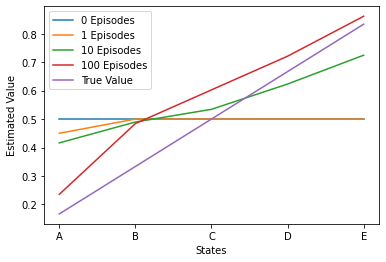

In [ ]:
Number_Episodes = [0,1,10,100]
step_size = 0.1
discouting = 0.9
V_Est_Epi_mean_TD_Res = TD_Epsiode(Number_Episodes,step_size,discouting)
V_True = np.array([0,1.6,2/6,3/6,4/6,5/6,1])
V_Est = np.array([0.5]*7)
TD_Plot(V_Est , V_True, V_Est_Epi_mean_TD_Res,Number_Episodes)

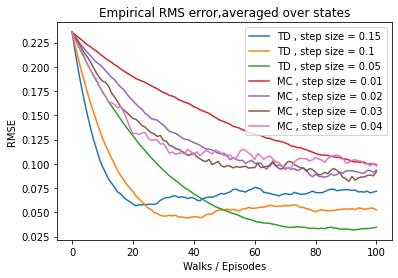

In [ ]:
Step_MC = [0.01,0.02,0.03,0.04]
Step_TD = [0.1,0.05,0.15]
(MC_RMSE , TD_RMSE) = RMSE_Calculation(Step_MC,Step_TD,100,V_True)
RMSE_Plot(MC_RMSE,TD_RMSE)

# Q7

In [ ]:
np.random.seed(40)
class CliffWalking:

  def __init__(self,gridsize,stepsize,epislon,gamma,action,startstate,goalstate):
    self.gridsize = gridsize
    self.stepsize = stepsize
    self.epislon = epislon
    self.gamma = gamma
    self.action = action
    self.startstate = startstate
    self.goalstate = goalstate
    self.Q_St = np.zeros((gridsize[0],gridsize[1],4))
    self.Q_St[startstate[0],startstate[1]] = 0
    self.Q_St[goalstate[0],goalstate[1]] = 0
      
  def NextStateReward(self,State,Action):
    h = self.gridsize[0]
    w = self.gridsize[1]
    if Action==0: # UP
      i = State[0]-1
      j = State[1]
      r = -1
    elif Action==1: # DOWN
      i = State[0]+1
      j = State[1]
      r = -1
    elif Action==2: # LEFT
      i = State[0]
      j = State[1]-1
      r = -1
    elif Action==3: # DOWN
      i = State[0]
      j = State[1]+1
      r = -1

    if i<0:
      i = 0
    elif i>=h:
      i = h-1
    
    if j<0:
      j = 0
    elif j>=w:
      j = w-1
  
    cliff = [k for k in range(1,11)] 
    if i==3 and j in cliff:
      NextState = self.startstate
      Reward = -100
    else :
      NextState = [i,j]
      Reward = r    

    return (NextState,Reward)
  
  def Policy(self,State):
    p = np.random.random()
    if p<self.epislon:
      Action = np.random.choice(self.action)
    else :
      Q_Values = self.Q_St[State[0],State[1]] 
      Action = np.argmax(Q_Values) 
    return Action  

  def Sarsa(self,InitialState):  # One episode 
      S = InitialState
      A = self.Policy(S)
      Total_reward = 0
      c = 0
      while S!=self.goalstate:
        c = c + 1
        if c==100:
          break
        (S_dash,R) = self.NextStateReward(S,A)
        A_dash = self.Policy(S_dash)
        for i in range(4):
          self.Q_St[S[0],S[1],i] = self.Q_St[S[0],S[1],i] + self.stepsize*(R + self.gamma*self.Q_St[S_dash[0],S_dash[1],i] - self.Q_St[S[0],S[1],i])
        S = S_dash
        A = A_dash  
        Total_reward = Total_reward + R
      return Total_reward  

  def Q_Learning(self,InitialState):  # One episode 
      S = InitialState
      A = self.Policy(S)
      Total_reward = 0
      c = 0
      while S!=self.goalstate:
        c = c + 1
        if c==100:
          break
        (S_dash,R) = self.NextStateReward(S,A)
        A_dash = self.Policy(S_dash)
        Max_Q_Values_NextState = max([self.Q_St[S_dash[0],S_dash[1],i] for i in range(4)])
        for i in range(4):
          self.Q_St[S[0],S[1],i] = self.Q_St[S[0],S[1],i] + self.stepsize*(R + self.gamma*Max_Q_Values_NextState - self.Q_St[S[0],S[1],i])
        S = S_dash
        A = A_dash  
        Total_reward = Total_reward + R      
      return Total_reward

def Plot_Sarsa_Q_Learning_Curve(gridsize,stepsize,epislon,gamma,action,startstate,goalstate,numberepisodes):
  sarsa_reward = np.zeros(numberepisodes)
  qlearning_reward = np.zeros(numberepisodes)

  sar = CliffWalking(gridsize,stepsize,epislon,gamma,action,startstate,goalstate)
  ql = CliffWalking(gridsize,stepsize,epislon,gamma,action,startstate,goalstate)
  
  InitialState = startstate
  for i in range(numberepisodes):
    sarsa_reward[i] = sarsa_reward[i] + sar.Sarsa(InitialState)
    qlearning_reward[i] =  qlearning_reward[i] + ql.Q_Learning(InitialState)

  plt.plot(sarsa_reward,label='Sarsa')
  plt.plot(qlearning_reward,label='Q-Learning')
  plt.xlabel('Episodes')
  plt.ylabel('Sum of rewards during episode')
  plt.legend()
  plt.show()
  return sarsa_reward , qlearning_reward


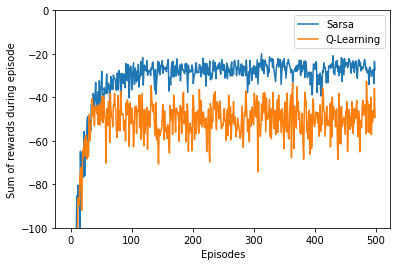

In [ ]:
gridsize = [4,12]
stepsize = 0.5
epislon = 0.1
gamma = 1
action = np.arange(4)
startstate = [3, 0]
goalstate = [3, 11]
numberepisodes = 500
sarsa_reward , qlearning_reward = Plot_Sarsa_Q_Learning_Curve(gridsize,stepsize,epislon,gamma,action,startstate,goalstate,numberepisodes)